In [1]:
!pip install contractions 
!pip install string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import contractions 
import string
import unicodedata

from bs4 import BeautifulSoup

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords                     
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
[nltk_data] Downloading package stopwords to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading packag

In [2]:
df = pd.read_csv("Tweets.csv")
df.sample(3).T

,13191,4595,4797
tweet_id,569917442455175168,569989812637167617,569727036627034112
airline_sentiment,neutral,neutral,neutral
airline_sentiment_confidence,0.6431,0.6874,1.0
negativereason,NaN,NaN,NaN
negativereason_confidence,0.0,NaN,NaN
airline,American,Southwest,Southwest
airline_sentiment_gold,NaN,NaN,NaN
name,politicalpizza,HanlonBrothers,Barbee72
negativereason_gold,NaN,NaN,NaN
retweet_count,0,0,0


In [3]:
print(df.duplicated().sum())
df= df.drop_duplicates()
print(df.duplicated().sum())

36
0


In [4]:
df_copy = df.copy()

In [5]:
lemmatizer = WordNetLemmatizer()

def strip_html(text):
    """Remove HTML tags from a string and return clean text."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_numbers(text):
    """Remove numeric characters from a string."""
    return re.sub(r'\d+', '', text)

def tokenize(text):
    """Split a string into a list of words using spaces."""
    return text.split()

def remove_non_ascii(words):
    """Normalize and remove non-ASCII characters from a list of words."""
    return [unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8', 'ignore') for w in words]

def to_lowercase(words):
    """Convert all words in a list to lowercase."""
    return [w.lower() for w in words]

def remove_punctuation(words):
    """Remove punctuation from each word in a list."""
    return [re.sub(r'[^\w\s]', '', w) for w in words if re.sub(r'[^\w\s]', '', w) != '']

def remove_stopwords(words, stopwords):
    """Remove stopwords from a list of words."""
    return [w for w in words if w not in stopwords]

def lemmatize_list(words):
    """Lemmatize a list of words using verb as the part of speech."""
    return [lemmatizer.lemmatize(w, pos='v') for w in words]

def normalize(text):
    """
    Apply a series of preprocessing steps to clean and normalize text:
    - Remove HTML
    - Remove numbers
    - Tokenize
    - Remove non-ASCII characters
    - Convert to lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize
    Returns a single cleaned string.
    """
    text = strip_html(text)
    text = remove_numbers(text)
    words = tokenize(text)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words, stopwords)
    words = lemmatize_list(words)
    return ' '.join(words)

In [6]:
stopwords = stopwords.words('english')
retained_stopwords =['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(stopwords) - set(retained_stopwords))

In [7]:
df = df_copy
df['text'] = df['text'].apply(normalize)
display(df['text'])

0                               virginamerica dhepburn say
1        virginamerica plus youve add commercials exper...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank get different flight chicago
14636    americanair leave minutes late flight warnings...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair ppl need know many seat next fligh...
Name: text, Length: 14604, dtype: object

=== Cross-Validation Results ===
                    CV_Accuracy     CV_F1
Model                                    
LogisticRegression     0.740002  0.715886
SVC                    0.739250  0.721942
RandomForest           0.710830  0.675001
LightGBM               0.709532  0.690580
XGBoost                0.701179  0.674103

Top 2 models: ['LogisticRegression', 'SVC']


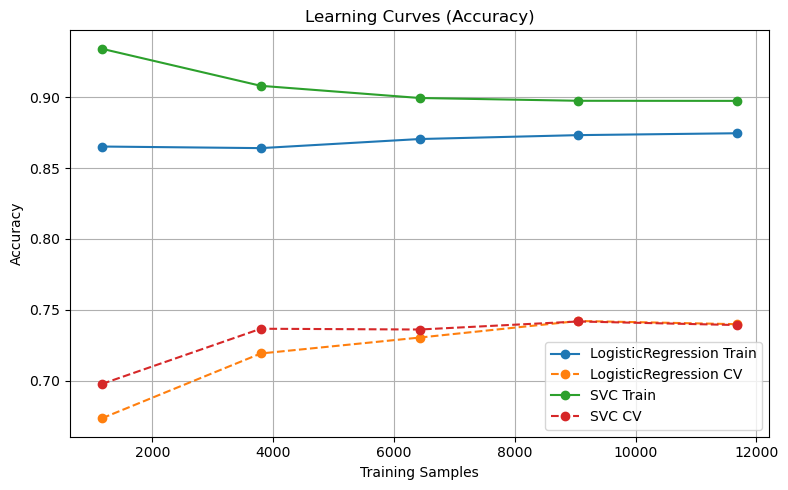


=== Test Set Performance ===

>> LogisticRegression
Accuracy: 0.785257873117298
F1 Score: 0.7729191286647096
              precision    recall  f1-score   support

           0     0.8145    0.9363    0.8712      2748
           1     0.6537    0.4903    0.5603       928
           2     0.7837    0.5850    0.6699       706

    accuracy                         0.7853      4382
   macro avg     0.7506    0.6705    0.7005      4382
weighted avg     0.7755    0.7853    0.7729      4382


>> SVC
Accuracy: 0.7884527612962118
F1 Score: 0.7798576433237678
              precision    recall  f1-score   support

           0     0.8278    0.9185    0.8708      2748
           1     0.6478    0.5172    0.5752       928
           2     0.7618    0.6388    0.6949       706

    accuracy                         0.7885      4382
   macro avg     0.7458    0.6915    0.7136      4382
weighted avg     0.7791    0.7885    0.7799      4382



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1) Prepare data
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['text'])
y = LabelEncoder().fit_transform(df['airline_sentiment'])

# 2) Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC':                SVC(kernel='linear', probability=True),
    'RandomForest':       RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost':            XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM':           LGBMClassifier(random_state=42)
}

# 3) Cross-validate
results = []
for name, clf in models.items():
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy',  n_jobs=-1).mean()
    f1  = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted', n_jobs=-1).mean()
    results.append((name, acc, f1))

df_cv = pd.DataFrame(results, columns=['Model','CV_Accuracy','CV_F1']).set_index('Model')
print("=== Cross-Validation Results ===")
print(df_cv.sort_values('CV_Accuracy', ascending=False))

# 4) Select top-2 by CV Accuracy
top2 = df_cv.sort_values('CV_Accuracy', ascending=False).index[:2].tolist()
print(f"\nTop 2 models: {top2}")

# 5) Plot learning curves for the two best
def plot_learning_curve(est, name):
    train_sizes, train_scores, test_scores = learning_curve(
        est, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1)
    train_mean = train_scores.mean(axis=1)
    test_mean  = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label=f'{name} Train')
    plt.plot(train_sizes, test_mean,  'o--', label=f'{name} CV')
    
plt.figure(figsize=(8,5))
for name in top2:
    plot_learning_curve(models[name], name)
plt.title("Learning Curves (Accuracy)")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Final train/test split and evaluation
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n=== Test Set Performance ===")
for name in top2:
    clf = models[name]
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    print(f"\n>> {name}")
    print("Accuracy:", accuracy_score(y_te, y_pred))
    print("F1 Score:",   f1_score(y_te, y_pred, average='weighted'))
    print(classification_report(y_te, y_pred, digits=4))


In [8]:
# Install imbalanced-learn if needed
!pip install --quiet imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# 1) Prepare data & encode labels
X_text = df['text']
y      = LabelEncoder().fit_transform(df['airline_sentiment'])

# 2) Define base classifiers
base_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC':                SVC(kernel='linear', probability=True),
    'RandomForest':       RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost':            XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM':           LGBMClassifier(random_state=42)
}

# 3) Build an imblearn Pipeline for each model: TF-IDF → SMOTE → Classifier
pipelines = {}
for name, clf in base_models.items():
    pipelines[name] = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('smote', SMOTE(random_state=42)),
        ('clf',   clf)
    ])

# 4) 5-fold CV to get Accuracy & F1
results = []
for name, pipe in pipelines.items():
    acc = cross_val_score(pipe, X_text, y, cv=5, scoring='accuracy',  n_jobs=-1).mean()
    f1  = cross_val_score(pipe, X_text, y, cv=5, scoring='f1_weighted', n_jobs=-1).mean()
    results.append((name, acc, f1))

df_cv = pd.DataFrame(results, columns=['Model','CV_Accuracy','CV_F1']).set_index('Model')
print("=== Cross-Validation with SMOTE ===")
print(df_cv.sort_values('CV_Accuracy', ascending=False))

# 5) Pick top-2 by CV_Accuracy
top2 = df_cv.sort_values('CV_Accuracy', ascending=False).index[:2].tolist()
print(f"\nTop 2 models: {top2}")

# 6) Plot learning curves for the two best
def plot_learning_curve(pipe, name):
    X_vec = pipe.named_steps['tfidf'].fit_transform(X_text)            # fit vectorizer
    y_enc = y
    train_sizes, train_scores, test_scores = learning_curve(
        pipe, X_vec, y_enc, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1
    )
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label=f'{name} Train')
    plt.plot(train_sizes, test_scores.mean(axis=1),  'o--',label=f'{name} CV')

plt.figure(figsize=(8,5))
for name in top2:
    plot_learning_curve(pipelines[name], name)
plt.title("Learning Curves (Accuracy) with SMOTE")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7) Final train/test split & test set evaluation
X_tr, X_te, y_tr, y_te = train_test_split(X_text, y, test_size=0.3,
                                         stratify=y, random_state=42)

print("\n=== Test Set Performance ===")
for name in top2:
    pipe = pipelines[name]
    pipe.fit(X_tr, y_tr)
    y_pred = pipe.predict(X_te)
    print(f"\n>> {name}")
    print("Accuracy:", accuracy_score(y_te, y_pred))
    print("F1 Score:", f1_score(y_te, y_pred, average='weighted'))
    print(classification_report(y_te, y_pred, digits=4))


=== Cross-Validation with SMOTE ===
                    CV_Accuracy     CV_F1
Model                                    
LogisticRegression     0.725694  0.720334
SVC                    0.719874  0.715146
RandomForest           0.718294  0.698135
LightGBM               0.705903  0.691918
XGBoost                0.695496  0.676200

Top 2 models: ['LogisticRegression', 'SVC']


ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\imblearn\pipeline.py", line 255, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\imblearn\pipeline.py", line 1104, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py", line 2091, in fit_transform
    X = super().fit_transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py", line 1372, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py", line 1259, in _count_vocab
    for feature in analyze(doc):
                   ^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py", line 108, in _analyze
    doc = preprocessor(doc)
          ^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py", line 66, in _preprocess
    doc = doc.lower()
          ^^^^^^^^^
AttributeError: 'csr_matrix' object has no attribute 'lower'. Did you mean: 'power'?


<Figure size 800x500 with 0 Axes>